# Data analysis 2

# 1 Importing libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import random as rd

import warnings
import random
import pickle
from tqdm import tqdm

warnings.filterwarnings('ignore')

# 2 Exploratory data analysis.

## 2.1 dataset with information about films.


In [2]:
movies_data = pd.read_csv("Dataset\movies.csv")
print("The size of dataset is", movies_data.shape)
movies_data.head()

The size of dataset is (87585, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87585 entries, 0 to 87584
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  87585 non-null  int64 
 1   title    87585 non-null  object
 2   genres   87585 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


**Let's extract the year from the "title"**

In [4]:
movies_data["year_shot"] = movies_data["title"].apply(lambda x: "".join(re.findall(r"\((\d+)\)+$", x)))
movies_data.head()

,movieId,title,genres,year_shot
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [5]:
movies_data.isnull().sum()

movieId      0
title        0
genres       0
year_shot    0
dtype: int64

In [6]:
# Let's have a look at the unique years. We see that some films don't have the year
movies_data["year_shot"].unique()

array(['1995', '1994', '1996', '1976', '1992', '1988', '1967', '1993',
       '1964', '1977', '1965', '1982', '1990', '1991', '1989', '1937',
       '1940', '1969', '1981', '1973', '1970', '1960', '1955', '1959',
       '1968', '1980', '1975', '1986', '1948', '1943', '1950', '1946',
       '1987', '1997', '1974', '1956', '1958', '1949', '1972', '1998',
       '1933', '1952', '1951', '1957', '1961', '1954', '1934', '1944',
       '1963', '1942', '1941', '1953', '1939', '1947', '1945', '1938',
       '1935', '1936', '1926', '1932', '1985', '1979', '1971', '1978',
       '1966', '1962', '1983', '1984', '1931', '1922', '1999', '1927',
       '1929', '1930', '1928', '1925', '1914', '2000', '1919', '1923',
       '1920', '1918', '1921', '2001', '1924', '2002', '2003', '1915',
       '2004', '1916', '1917', '', '2005', '2006', '1902', '1903', '2007',
       '2008', '2009', '1912', '2010', '1913', '2011', '1898', '1899',
       '1894', '2012', '1910', '2013', '1896', '2014', '2015', '1895',
  

In [7]:
movies_data[movies_data["year_shot"] == ""]
print("-------")
print("The number with blanks in 'year' -", len(movies_data[movies_data["year_shot"] == ""]))

-------
The number with blanks in 'year' - 770


In [8]:
mask = movies_data["year_shot"] == ""
movies_data.loc[mask, "year_shot"] = movies_data[mask]["title"].apply(lambda x: "".join(re.findall(r"\((\d+)\)", x)))

In [9]:
movies_data[movies_data["year_shot"] == ""]
print("-------")
print("The number with blanks in 'year' -", len(movies_data[movies_data["year_shot"] == ""]))

-------
The number with blanks in 'year' - 615


In [10]:
movies_data.loc[movies_data["year_shot"] == "", "year_shot"] = np.nan

In [11]:
movies_data[movies_data["year_shot"].isna()]

,movieId,title,genres,year_shot
15038,79607,"Millions Game, The (Das Millionenspiel)",Action|Drama|Sci-Fi|Thriller,NaN
25425,123619,Terrible Joe Moran,(no genres listed),NaN
26356,125571,The Court-Martial of Jackie Robinson,(no genres listed),NaN
26381,125632,In Our Garden,(no genres listed),NaN
26466,125958,Stephen Fry In America - New World,(no genres listed),NaN
...,...,...,...,...
86528,288927,Fortunes,Comedy,NaN
86634,289193,The Wonderful Story of Henry Sugar,Adventure|Children|Comedy,NaN
86833,289909,Rattler,(no genres listed),NaN
87074,290775,Being Romanian: A Family Journal,(no genres listed),NaN


**We see that there are some blanks in "year". I'll delete these rows as their amount is not huge.**

In [12]:
# convert "year" to numeric
mask1 = (~movies_data["year_shot"].isna())
movies_data.loc[mask1, "year_shot"] = movies_data.loc[mask1, "year_shot"].astype(int)

year_shot
1874    Axes(0.125,0.11;0.775x0.77)
1878    Axes(0.125,0.11;0.775x0.77)
1880    Axes(0.125,0.11;0.775x0.77)
1882    Axes(0.125,0.11;0.775x0.77)
1883    Axes(0.125,0.11;0.775x0.77)
                   ...             
2019    Axes(0.125,0.11;0.775x0.77)
2020    Axes(0.125,0.11;0.775x0.77)
2021    Axes(0.125,0.11;0.775x0.77)
2022    Axes(0.125,0.11;0.775x0.77)
2023    Axes(0.125,0.11;0.775x0.77)
Name: year_shot, Length: 142, dtype: object

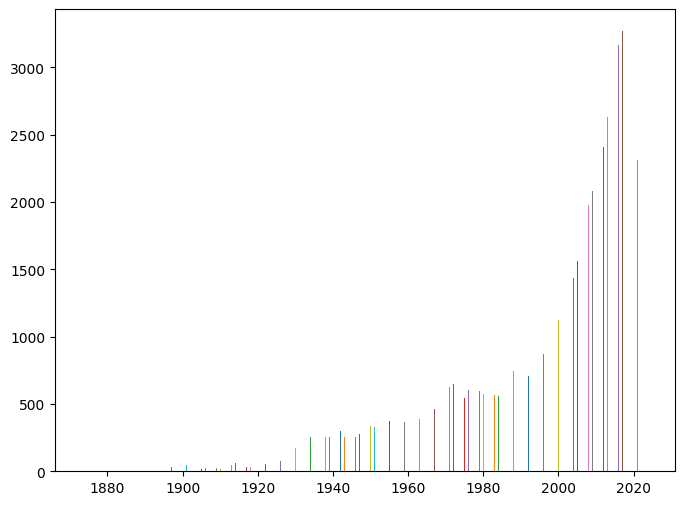

In [13]:
movies_data.groupby("year_shot")["year_shot"].hist(grid=False ,figsize=(8, 6))

In [14]:
movies_data.head()

,movieId,title,genres,year_shot
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [15]:
movies_data.groupby("year_shot")["movieId"].count()

year_shot
1874       1
1878       2
1880       1
1882       1
1883       1
        ... 
2019    3084
2020    2629
2021    2314
2022    2091
2023     952
Name: movieId, Length: 142, dtype: int64

## 2.2 dataset with information about ratings


In [17]:
ratings_data = pd.read_csv(r"Dataset\ratings.csv")
print("The size of dataset is", ratings_data.shape)
ratings_data.head()

The size of dataset is (32000204, 4)


,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858


In [18]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 976.6 MB


In [19]:
ratings_data.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [20]:
# Let's have a look at the unique number of users
ratings_data[["userId"]].nunique() 

userId    200948
dtype: int64

**Before we begin to do manipulation with this dataset I cut some users in order to do calculations faster**

In [21]:
random.seed(0)
special_users = random.sample(list(ratings_data["userId"]), 800)
print(len(special_users))

800


In [22]:
special_ratings_data = ratings_data[ratings_data["userId"].isin(special_users)]
print(special_ratings_data.shape)
special_ratings_data.head()

(531213, 4)


,userId,movieId,rating,timestamp
2305,24,1,4.0,945353745
2306,24,34,4.0,945354032
2307,24,65,3.0,945353646
2308,24,260,3.0,945353633
2309,24,333,1.0,945354118


In [23]:
# convert time to more convenient format
special_ratings_data["date"] =  pd.to_datetime(special_ratings_data.timestamp).dt.date # convert Unix time to a format convenient for us
special_ratings_data.head()

,userId,movieId,rating,timestamp,date
2305,24,1,4.0,945353745,1970-01-01
2306,24,34,4.0,945354032,1970-01-01
2307,24,65,3.0,945353646,1970-01-01
2308,24,260,3.0,945353633,1970-01-01
2309,24,333,1.0,945354118,1970-01-01


<Axes: >

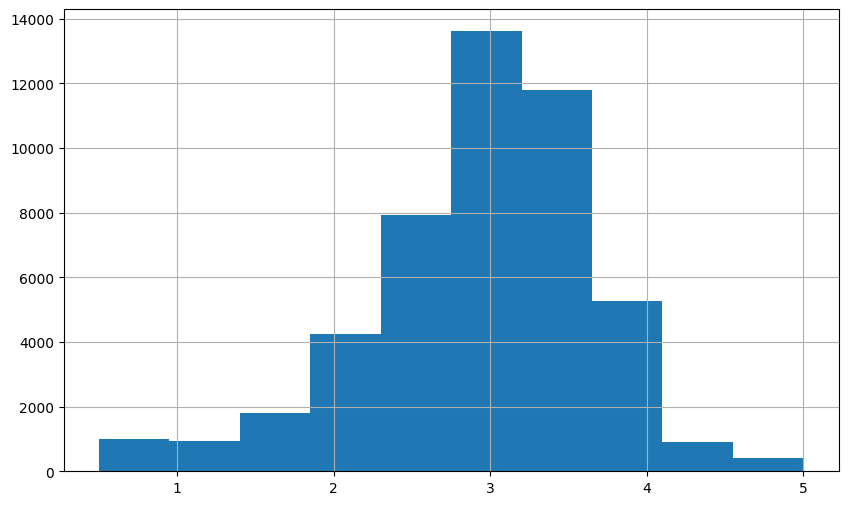

In [24]:
# distribution of mean rating
special_ratings_data.groupby("movieId").rating.mean().hist(figsize=(10, 6)) 

# 3 Feature engineering.

In [27]:
special_ratings_data.drop("timestamp", axis=1, inplace=True)
special_ratings_data.head()

,userId,movieId,rating,date
2305,24,1,4.0,1970-01-01
2306,24,34,4.0,1970-01-01
2307,24,65,3.0,1970-01-01
2308,24,260,3.0,1970-01-01
2309,24,333,1.0,1970-01-01


In [28]:
# delete those films where we have Nan in the "year"
special_ratings_data = special_ratings_data[~(special_ratings_data["movieId"].isin(movies_data[movies_data["year_shot"].isna()]["movieId"]))]
print(special_ratings_data.shape)
special_ratings_data.head()

(530243, 4)


,userId,movieId,rating,date
2305,24,1,4.0,1970-01-01
2306,24,34,4.0,1970-01-01
2307,24,65,3.0,1970-01-01
2308,24,260,3.0,1970-01-01
2309,24,333,1.0,1970-01-01


In [29]:
movies_data = movies_data[~(movies_data["year_shot"].isna())]
print(movies_data.shape)
movies_data.head()

(86970, 4)


,movieId,title,genres,year_shot
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [30]:
np.sort(movies_data["year_shot"].unique())

array([1874, 1878, 1880, 1882, 1883, 1885, 1887, 1888, 1889, 1890, 1891,
       1892, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903,
       1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914,
       1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925,
       1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936,
       1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947,
       1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype=object)

**Split the "genre" column in movies_data dataset**

In [31]:
movies_data["genres_list"] = movies_data["genres"].str.split("|")
movies_data.head()

,movieId,title,genres,year_shot,genres_list
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),Comedy,1995,[Comedy]


In [32]:
# convert the "genres_list columns" to pd.Series in order to extract genres from the lists to seperate columns
genres_list_to_series = pd.Series(movies_data.genres_list)
genres_list_to_series.head()

0    [Adventure, Animation, Children, Comedy, Fantasy]
1                       [Adventure, Children, Fantasy]
2                                    [Comedy, Romance]
3                             [Comedy, Drama, Romance]
4                                             [Comedy]
Name: genres_list, dtype: object

In [33]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [34]:
# for exploding lists we will use MultiLabelBinarizer()
m1b = MultiLabelBinarizer()
one_hot_genres = pd.DataFrame(m1b.fit_transform(genres_list_to_series), columns=m1b.classes_)
one_hot_genres.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
one_hot_genres.isnull().sum()

(no genres listed)    0
Action                0
Adventure             0
Animation             0
Children              0
Comedy                0
Crime                 0
Documentary           0
Drama                 0
Fantasy               0
Film-Noir             0
Horror                0
IMAX                  0
Musical               0
Mystery               0
Romance               0
Sci-Fi                0
Thriller              0
War                   0
Western               0
dtype: int64

**Let's see how many films have "no genres listed"**

In [36]:
print("The amount of films without genres - ",len(one_hot_genres[one_hot_genres["(no genres listed)"]==1]))

The amount of films without genres -  6707


In [37]:
print("The percentage of films which don't have genres", round(len(one_hot_genres[one_hot_genres["(no genres listed)"]==1])/len(one_hot_genres) * 100), "%")

The percentage of films which don't have genres 8 %


**Concat the dataframe with seperate genres with the main dataframe**

In [38]:
movies_data_concat = pd.concat([movies_data.reset_index(drop=True), one_hot_genres.reset_index(drop=True)], axis=1)
movies_data_concat.head()

,movieId,title,genres,year_shot,genres_list,(no genres listed),Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,"[Adventure, Children, Fantasy]",0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,"[Comedy, Romance]",0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,"[Comedy, Drama, Romance]",0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,1995,[Comedy],0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
movies_data_concat.isnull().sum()

movieId               0
title                 0
genres                0
year_shot             0
genres_list           0
(no genres listed)    0
Action                0
Adventure             0
Animation             0
Children              0
Comedy                0
Crime                 0
Documentary           0
Drama                 0
Fantasy               0
Film-Noir             0
Horror                0
IMAX                  0
Musical               0
Mystery               0
Romance               0
Sci-Fi                0
Thriller              0
War                   0
Western               0
dtype: int64

In [40]:
movies_data_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86970 entries, 0 to 86969
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   movieId             86970 non-null  int64 
 1   title               86970 non-null  object
 2   genres              86970 non-null  object
 3   year_shot           86970 non-null  object
 4   genres_list         86970 non-null  object
 5   (no genres listed)  86970 non-null  int64 
 6   Action              86970 non-null  int64 
 7   Adventure           86970 non-null  int64 
 8   Animation           86970 non-null  int64 
 9   Children            86970 non-null  int64 
 10  Comedy              86970 non-null  int64 
 11  Crime               86970 non-null  int64 
 12  Documentary         86970 non-null  int64 
 13  Drama               86970 non-null  int64 
 14  Fantasy             86970 non-null  int64 
 15  Film-Noir           86970 non-null  int64 
 16  Horror              86

# 4 Splitting to train and test datasets

We will split our data to global train(for training the RL model) and global test(for testing the results of RL model).

**For more clarity**

In [ ]:
# let's see how many films each person has in the dataframe
number_movies = special_ratings_data[["userId", "movieId"]].groupby("userId")["movieId"].count().\
                to_frame().reset_index().rename(columns={"movieId": "number_of_movies"})
print("Total number of people", len(number_movies))
print("Max value of movies watched - ", number_movies["number_of_movies"].max())
print("Min value of movies watched - ", number_movies["number_of_movies"].min())
print("Mean value of the number watched movies - ", number_movies["number_of_movies"].mean())
number_movies.head()

Total number of people 790
Max value of movies watched -  33229
Min value of movies watched -  20
Mean value of the number watched movies -  323.0


,userId,number_of_movies
count,790.000000,790.000000
mean,100800.783544,671.193671
std,59229.860156,1493.802046
min,24.000000,20.000000
25%,46952.000000,135.000000
50%,102317.000000,323.000000
75%,151319.250000,734.500000
max,200811.000000,33229.000000


<Axes: xlabel='number_of_movies'>

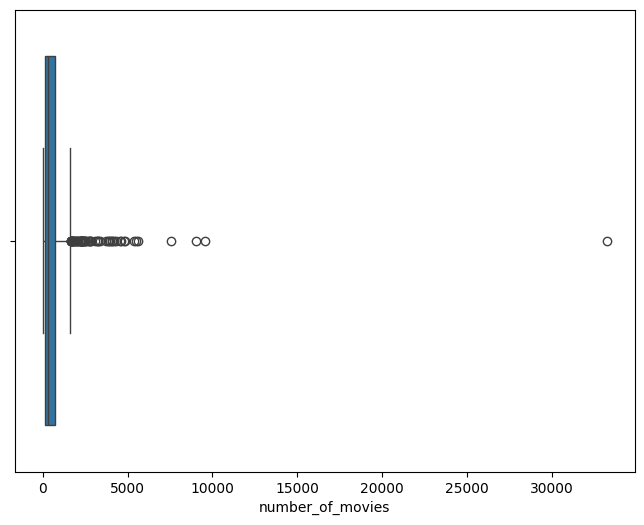

In [42]:
fig = plt.figure(figsize=(8, 6))
sns.boxplot(x=number_movies["number_of_movies"])

As we don't have the true time when a movie was watched it's hard to generate good recommendations. I mean if we had the time we would cut the last n-days to the test set and try to predict recommendations based on other days. We would simulate the real situation by splitting the initial data in such way.

So I suggest to get rid of users which have less than 100 movies watched, after that to cut 50 movies for test and the rest for train.

In [43]:
final_users = number_movies[number_movies["number_of_movies"] >= 100]
print(final_users.shape)
final_users.head()

(647, 2)


,userId,number_of_movies
2,245,594
3,328,930
5,702,1113
6,1707,609
9,2748,370


In [44]:
final_ratings = special_ratings_data[special_ratings_data["userId"].isin(final_users["userId"])]
print(final_ratings.shape)
final_ratings.head()

(522207, 4)


,userId,movieId,rating,date
37943,245,1,3.0,1970-01-01
37944,245,2,3.5,1970-01-01
37945,245,39,4.0,1970-01-01
37946,245,47,3.5,1970-01-01
37947,245,48,4.5,1970-01-01


## Global train-test

In [45]:
# forming test dataset
for_test = []
for user in final_ratings["userId"].unique():
    for_test.append(final_ratings[final_ratings["userId"] == user].iloc[-50:])
global_test = pd.concat(for_test, ignore_index=True)
print(global_test.shape)
global_test.head()

(32350, 4)


,userId,movieId,rating,date
0,245,161966,3.5,1970-01-01
1,245,162608,3.5,1970-01-01
2,245,164899,4.0,1970-01-01
3,245,164909,4.5,1970-01-01
4,245,165413,2.5,1970-01-01


In [46]:
global_train = pd.merge(final_ratings,global_test, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
print(global_train.shape)
global_train.head()

(489857, 4)


,userId,movieId,rating,date
0,245,1,3.0,1970-01-01
1,245,2,3.5,1970-01-01
2,245,39,4.0,1970-01-01
3,245,47,3.5,1970-01-01
4,245,48,4.5,1970-01-01


In [47]:
# let's check if all users from test dataset are in train
all(global_test["userId"].isin(global_train["userId"]))

True

## Model Development